# Lektion 11

## Extrema unter Nebenbedingungen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
init_printing()

In [2]:
x = Symbol('x')
y = Symbol('y')
lam = Symbol('lambda')

In [3]:
g = x**4 + y**4 - 1

In [4]:
f = x**2 + y**2

Gesucht: Maximum von $f$ unter der Nebenbedingung $g=0$

In [5]:
grf = Matrix([f]).jacobian([x,y])
grf

[2⋅x  2⋅y]

In [6]:
grg = Matrix([g]).jacobian([x,y])
grg

⎡   3     3⎤
⎣4⋅x   4⋅y ⎦

In [7]:
gls = grf - lam*grg
gls

⎡       3               3      ⎤
⎣- 4⋅λ⋅x  + 2⋅x  - 4⋅λ⋅y  + 2⋅y⎦

In [8]:
glsmenge = set(gls)

In [9]:
glsmenge.add(g)
glsmenge

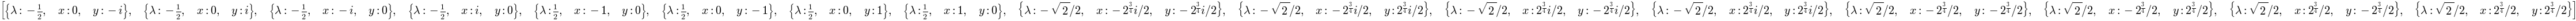

In [10]:
Lsg = solve(glsmenge)
Lsg

In [11]:
def test_real(l):
    x0 = x.subs(l)
    y0 = y.subs(l)
    return x0.is_real and y0.is_real

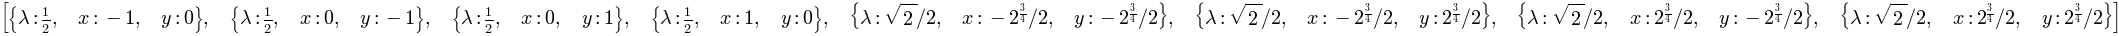

In [12]:
reelle_lsg = [l for l in Lsg if test_real(l)]
reelle_lsg

In [13]:
werte = [f.subs(l) for l in reelle_lsg]
werte

In [14]:
fn = lambdify((x,y), f, 'numpy')
gn = lambdify((x,y), g, 'numpy')

In [15]:
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
Wf = fn(X, Y)
Wg = gn(X, Y)

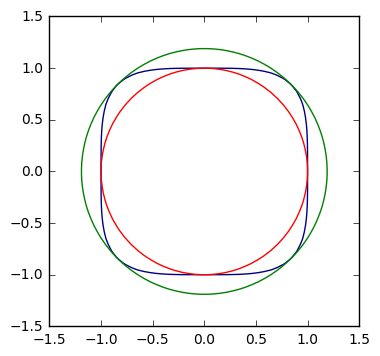

In [16]:
plt.contour(X, Y, Wg, levels=[0])
plt.contour(X, Y, Wf, levels=[1, np.sqrt(2)], colors=['red', 'green'])
plt.axis('image');

## Plotverschönerung 

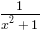

In [18]:
x = Symbol('x')
f = 1/(1+x**2)
f

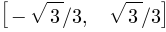

In [19]:
wendestellen = solve(f.diff(x,2))
wendestellen

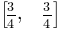

In [20]:
werte = [f.subs(x, w) for w in wendestellen]
werte

In [21]:
xn = np.linspace(-3.5, 3.5, 100)
fn = lambdify(x, f)
wn = fn(xn)

In [22]:
props = {}
props['arrowstyle'] = '-|>'

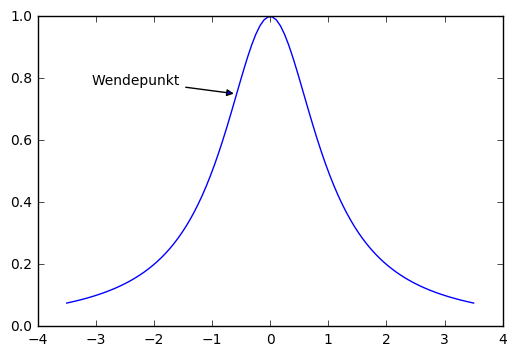

In [23]:
plt.plot(xn, wn)
wx = wendestellen[0].n()
wy = fn(wx)
plt.annotate("Wendepunkt", (wx, wy), (wx-2.5, wy+.03),
            arrowprops=props);

## Differentialgleichungen

In [24]:
x = Symbol('x')
y = Function('y')
dgl = Eq(y(x).diff(x), 2*y(x)+1)
dgl

In [25]:
Lsg = dsolve(dgl)
Lsg

In [26]:
print(Lsg)

Eq(y(x), C1*exp(2*x)/2 - 1/2)


In [27]:
Lsg.subs(C1, 3)   # NameError

NameError: name 'C1' is not defined

In [28]:
C1 = Symbol('C1')

In [29]:
Lsg.subs(C1, 3)

In [30]:
f = Lsg.rhs

In [31]:
y0 = 0

In [32]:
ab = Eq(f.subs(x,0), y0)
ab

In [33]:
Lsg_AWA = solve(ab)
f.subs(C1, Lsg_AWA[0])

In [34]:
dgl = Eq(y(x).diff(x), y(x)-x**3+3*x-2)
dgl

In [35]:
Lsg = dsolve(dgl).expand()
Lsg

In [36]:
f = Lsg.rhs

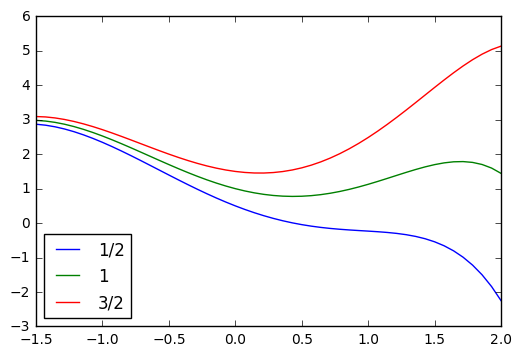

In [37]:
xn = np.linspace(-1.5,2)
for y0 in [S(1)/2, 1, S(3)/2]:
    ab = Eq(f.subs(x, 0), y0)
    Lsg_AWA = solve(ab)
    fn = lambdify(x, f.subs(C1, Lsg_AWA[0]), 'numpy')
    plt.plot(xn, fn(xn), label=y0)
plt.legend(loc='lower left');

In [42]:
xq = np.linspace(-1.4, 1.8, 13)
yq = np.linspace(-2.5, 5.5, 11)
X, Y = np.meshgrid(xq, yq)
vf = np.array([dgl.rhs.subs({x: xx, y(x): yy})
               for yy in yq for xx in xq]).reshape(11, 13).astype(float)
X.shape, vf.shape

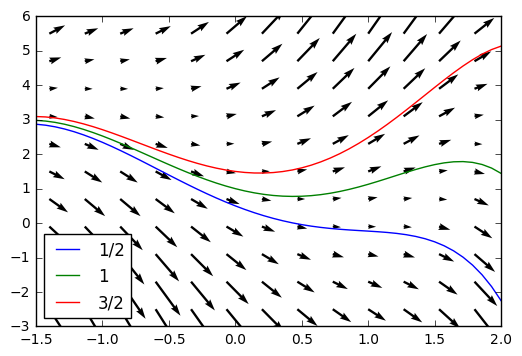

In [45]:
plt.quiver(X, Y, np.ones_like(X), vf, angles='xy')
for y0 in [S(1)/2, 1, S(3)/2]:
    ab = Eq(f.subs(x, 0), y0)
    Lsg_AWA = solve(ab)
    fn = lambdify(x, f.subs(C1, Lsg_AWA[0]), 'numpy')
    plt.plot(xn, fn(xn), label=y0)
plt.legend(loc='lower left');

## Definitionsbereiche

In [46]:
y = Function('y')
y0 = Symbol('y_0', real=True)
x = Symbol('x')

In [47]:
dgl = Eq(y(x).diff(x), exp(y(x))*sin(x))
dgl

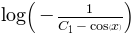

In [48]:
Lsg = dsolve(dgl)
f = Lsg.rhs
f

In [49]:
xq = np.linspace(-3.5, 9.5, 13)
yq = np.linspace(-.8, 1.95, 12)
X, Y = np.meshgrid(xq, yq)
vf = np.array([dgl.rhs.subs({x: xx, y(x): yy})
               for yy in yq for xx in xq]).reshape(12, 13).astype(float)

In [50]:
xn = np.linspace(-2.2, 9, 200)
ab = Eq(f.subs(x, 0), y0)
Lsg_AWA = solve(ab, C1)
Lsg_AWA

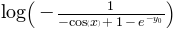

In [51]:
f_y0 = f.subs(C1, Lsg_AWA[0])
f_y0

Probe

In [54]:
dgl.subs(y(x), f_y0).doit().simplify()

In [55]:
f_y0.subs(x, 0) == y0

True

In [56]:
f_y0.subs(x, 0).simplify()

/home/braun/miniconda3/envs/WS1617/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in log
  """
/home/braun/miniconda3/envs/WS1617/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


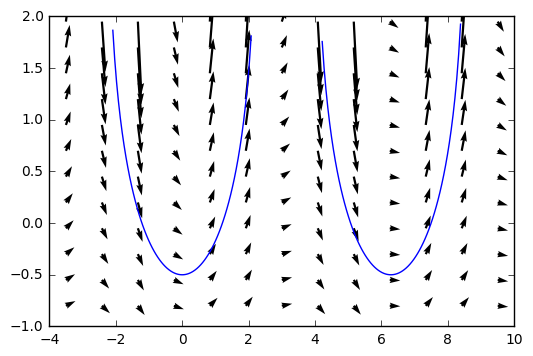

In [57]:
fn = lambdify(x, f_y0.subs(y0, -.5), 'numpy')
wn = fn(xn)
wn[wn>2] = np.nan
plt.plot(xn, wn)
plt.quiver(X, Y, np.ones_like(X), vf, angles='xy');

Wo ist die Lösung definiert?

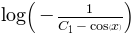

In [58]:
f

In [59]:
denom(exp(f_y0))

In [60]:
solve(denom(exp(f_y0)), x)

In [61]:
solve(Eq(1-exp(-y0), -1))

/home/braun/miniconda3/envs/WS1617/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in log
  """
/home/braun/miniconda3/envs/WS1617/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


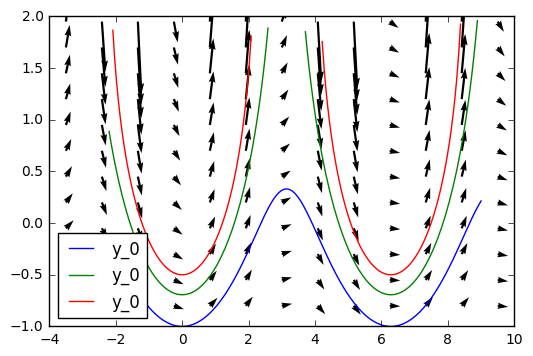

In [62]:
plt.quiver(X, Y, np.ones_like(X), vf, angles='xy')
for yy in [-1, -log(2), -S(1)/2]:
    fn = lambdify(x, f_y0.subs(y0, yy), 'numpy')
    wn = fn(xn)
    wn[wn>2] = np.nan
    plt.plot(xn, wn, label=y0)
plt.legend(loc='lower left');

Die Lösung der Anfangswertaufgabe 
$$ y' = e^y \sin(x), y(0) = y_0 $$
ist für $y_0 > \ln(2)$ auf ganz $\mathbb R$ definiert, sonst nur auf dem Intervall $]-\arccos(1-e^{-y_0}), \arccos(1-e^{-y_0})[ $.

## Höhere Ordnung

In [63]:
a = Symbol('a')
lam = Symbol('lambda')

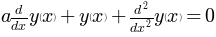

In [64]:
dgl = Eq(y(x).diff(x,2) + a*diff(y(x),x) + y(x), 0)
dgl

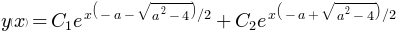

In [65]:
dsolve(dgl)

In [66]:
tmp = dgl.lhs.subs(y(x), exp(lam*x)).doit()
tmp

In [67]:
chi = (tmp * exp(-lam*x)).expand()
chi

$\chi$ ist das charakteristische Polynom

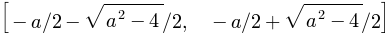

In [68]:
Lsg = solve(chi, lam)
Lsg